Adaptée pour le KHADRAOUI M.EL BACHIR pour le TER sur Rainnet

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:

import requests
#Adresse URL de téléchargement (directe) du modèle de Rainnet
file_url="https://zenodo.org/record/3630429/files/rainnet.h5?download=1"
    
r = requests.get(file_url, stream = True)
#Ecriture du modele dans le dossier Drive
with open("/content/gdrive/My Drive/rainnet.h5", "wb") as file:
    for block in r.iter_content(chunk_size = 1024):
        if block:
            file.write(block)

In [2]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
from keras.models import load_model
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [3]:
model = load_model("/content/gdrive/My Drive/rainnet.h5")
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 928, 928, 4  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 928, 928, 64  2368        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 activation_1 (Activation)      (None, 928, 928, 64  0           ['conv2d_1[0][0]']               
                                )                                                           

In [4]:
import numpy as np

In [7]:
data = np.loadtxt('text.txt')
data2 = np.loadtxt('text2.txt')
data3 = np.loadtxt('text3.txt')
data4 = np.loadtxt('text4.txt')


In [8]:
#Pad de (14,14) pour obtenir des images passant de 900 à 928
data = np.pad(data, (14,14),'constant', constant_values=(0)) 
data2 = np.pad(data2, (14,14),'constant', constant_values=(0))
data3 = np.pad(data3, (14,14),'constant', constant_values=(0))
data4 = np.pad(data4, (14,14),'constant', constant_values=(0))


In [9]:
print(data.shape)
print(data2.shape)
print(data3.shape)
print(data4.shape)


(928, 928)
(928, 928)
(928, 928)
(928, 928)


In [10]:
full = np.zeros((4,1,928,928))

In [11]:
full[0] = data #2009/03/09 09:35
full[1] = data2 #2009/03/09 09:40
full[2] = data3 #2009/03/09 09:45
full[3] = data4 #2009/03/09 09:50

In [12]:
full = full.reshape(1,928,928,4)
#1 array of 4 x (928 x 928) 

In [13]:
data.shape

(928, 928)

In [14]:
import matplotlib.pyplot as plt

In [ ]:
plt.imshow(data)
plt.show()

In [1]:
a = model.predict(full)
#model.summary()

NameError: ignored

In [31]:
print(a)

[[[[ 0.1260323 ]
   [ 0.09364752]
   [ 0.07061873]
   ...
   [ 0.05705769]
   [ 0.05314478]
   [ 0.05993225]]

  [[ 0.1437814 ]
   [ 0.07573389]
   [ 0.06534545]
   ...
   [ 0.04667076]
   [ 0.04121774]
   [ 0.03954901]]

  [[ 0.13049355]
   [ 0.08957409]
   [ 0.06290187]
   ...
   [ 0.04841559]
   [ 0.04590864]
   [ 0.04133736]]

  ...

  [[ 0.13425285]
   [ 0.10073435]
   [ 0.07348505]
   ...
   [ 0.06296891]
   [ 0.05812809]
   [ 0.05257019]]

  [[ 0.10401088]
   [ 0.10305621]
   [ 0.07055643]
   ...
   [ 0.06511201]
   [ 0.0612244 ]
   [ 0.05895157]]

  [[ 0.00954089]
   [ 0.01335263]
   [ 0.00080584]
   ...
   [-0.00913276]
   [-0.02280463]
   [-0.04115871]]]]


In [32]:
#La prédiction t+5
a.shape

(1, 928, 928, 1)

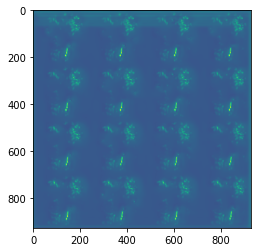

In [23]:
b = a.reshape(928,928) #Pour pouvoir l'afficher
plt.imshow(b)
plt.show()

In [24]:
full2 = np.zeros((4,1,928,928))

In [27]:
data = np.loadtxt('text5.txt')
data2 = np.loadtxt('text6.txt')
data3 = np.loadtxt('text7.txt')
data4 = np.loadtxt('text8.txt')

In [28]:
data = np.pad(data, (14,14),'constant', constant_values=(0)) #Pad de (14,14) pour obtenir des images passant de 900 à 928
data2 = np.pad(data2, (14,14),'constant', constant_values=(0))
data3 = np.pad(data3, (14,14),'constant', constant_values=(0))
data4 = np.pad(data4, (14,14),'constant', constant_values=(0))

full2[0] = data
full2[1] = data2
full2[2] = data3
full2[3] = data4

full2 = full2.reshape(1,928,928,4)

In [29]:
model.evaluate(full, full2) 

1/1 [==============================] - 1s 1s/step - loss: 7.7024e-04


0.0007702427101321518

# Conclusion :
La perte est moindre ce qui fait que le modèle est efficace.